In [ ]:
# Download the dataset 

! gdown -- 19MDJylakwdTKNS55zMpTtZX8PbYWNTkX # https://drive.google.com/file/d/19MDJylakwdTKNS55zMpTtZX8PbYWNTkX/view?usp=sharing  


Downloading...
From: https://drive.google.com/uc?id=19MDJylakwdTKNS55zMpTtZX8PbYWNTkX
To: /content/rPPG-BP-UKL_rppg_7s.h5
100% 55.4M/55.4M [00:00<00:00, 122MB/s]


In [ ]:
# import required libraries
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

filename = "rPPG-BP-UKL_rppg_7s.h5"

f = h5py.File(filename, "r")
datasetNames = [n for n in f.keys()]
for n in datasetNames:
    print(n)
    
print('-----'*3)
    
# DATA

df_rppg = pd.DataFrame(np.array(h5py.File(filename)['rppg']))
print(df_rppg.shape)

df_id = pd.DataFrame(np.array(h5py.File(filename)['subject_idx']))
print(df_id.shape)

df_label = pd.DataFrame(np.array(h5py.File(filename)['label']))
print(df_label.shape) # Systolic and diastolic blood pressure values

label
rppg
subject_idx
---------------
(875, 7851)
(1, 7851)
(2, 7851)


In [ ]:
df_label = df_label.T.rename(columns={0: "Sys", 1: "Dia"})
df_label[:3]

,Sys,Dia
0,136.991885,71.995735
1,136.991885,71.995735
2,136.991885,71.995735


In [ ]:
df = pd.concat([df_rppg.T, df_label.reindex(df_rppg.T.index)], axis=1)


In [ ]:
X = df.iloc[:,:-2] 

In [ ]:
y = df.iloc[:,875:] # BOTH Systolic and Diastolic

In [ ]:
y

,Sys,Dia
0,136.991885,71.995735
1,136.991885,71.995735
2,136.991885,71.995735
3,136.991885,71.995735
4,136.991885,71.995735
...,...,...
7846,162.990345,78.995321
7847,162.990345,78.995321
7848,162.990345,78.995321
7849,163.541073,78.995321


In [ ]:
y_sys = df.iloc[:, 875] # Systolic
y_dia = df.iloc[:, 876] # Diastolic separately

In [ ]:
y_sys = y_sys.values
y_dia = y_dia.values

In [ ]:
y = y.values 

In [ ]:
y

array([[136.99188505,  71.99573521],
       [136.99188505,  71.99573521],
       [136.99188505,  71.99573521],
       ...,
       [162.99034499,  78.99532058],
       [163.54107286,  78.99532058],
       [164.39003864,  79.12978284]])

In [ ]:
X.shape

(7851, 875)

In [ ]:
X_new = df.iloc[:,:180]
X_new.shape

(7851, 180)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pickle



# 1st Model - Adam

In [ ]:


x_train, x_test, y_train, y_test_1 = train_test_split(X_new , y, test_size=0.2, random_state=0)


model5 = Sequential()
model5.add(Dense(96, input_dim = 180, activation='relu'))
model5.add(Dense(84, activation='relu'))
model5.add(Dense(72, activation='relu'))
model5.add(Dense(60, activation='relu'))
model5.add(Dense(48, activation='relu'))
model5.add(Dense(36, activation='relu'))
model5.add(Dense(24, activation='relu'))
model5.add(Dense(12, activation='relu'))
model5.add(Dense(2, activation='relu'))

model5.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model5.fit(x_train, y_train, epochs=500, batch_size=64)

model5.save("model_5.h5")


pickle.dump(model5, open('modelFirst.pkl', 'wb'))


Epoch 1/500
99/99 [==============================] - 2s 6ms/step - loss: 5133.0078 - mean_absolute_error: 53.3820
Epoch 2/500
99/99 [==============================] - 1s 8ms/step - loss: 2216.4824 - mean_absolute_error: 34.1556
Epoch 3/500
99/99 [==============================] - 1s 8ms/step - loss: 1708.5551 - mean_absolute_error: 30.1123
Epoch 4/500
99/99 [==============================] - 1s 8ms/step - loss: 1213.6871 - mean_absolute_error: 25.0525
Epoch 5/500
99/99 [==============================] - 1s 8ms/step - loss: 477.5058 - mean_absolute_error: 16.3941
Epoch 6/500
99/99 [==============================] - 1s 7ms/step - loss: 180.2321 - mean_absolute_error: 10.6576
Epoch 7/500
99/99 [==============================] - 1s 5ms/step - loss: 158.1027 - mean_absolute_error: 10.1012
Epoch 8/500
99/99 [==============================] - 1s 7ms/step - loss: 154.9825 - mean_absolute_error: 10.0019
Epoch 9/500
99/99 [==============================] - 1s 7ms/step - loss: 143.4643 - mean_abs

In [ ]:
# test
# model = load_model('model.h5')

predictions5= model5.predict(x_test)
print("PRED",predictions5[0:10])
print("\n")
print("TEST",y_test_1[0:10])

errors = abs(y_test_1 - predictions5)
print('Mean Absolute Error:', np.mean(errors, axis=0))

errors = y_test_1 - predictions5
print('Standard Deviation: ', np.std(errors, axis=0))


PRED [[140.43626   65.50269 ]
 [160.22527   73.22561 ]
 [137.36371   63.90984 ]
 [156.22208   63.070904]
 [114.94327   63.16384 ]
 [155.3354    60.95838 ]
 [141.38577   68.15841 ]
 [114.98026   53.261906]
 [134.70969   65.001816]
 [131.06114   69.552284]]


TEST [[129.98135831  47.04511122]
 [164.32087098  77.326354  ]
 [140.99164812  61.99632754]
 [154.99081885  65.96421097]
 [126.83449612  56.99662371]
 [148.3905958   62.39468186]
 [136.53800184  69.99585368]
 [122.99271432  68.99591291]
 [116.94814475  53.64925178]
 [141.58685138  70.99579444]]
Mean Absolute Error: [10.54638888  7.45738323]
Standard Deviation:  [19.42085345 12.47968101]


In [ ]:
type(y_test_1)

numpy.ndarray

In [ ]:
signal_from_cam_2 = [0.03895238786935806,0.030762506648898125,0.01937410607933998,-0.01983427256345749,-0.05868532508611679,-0.07004053890705109,-0.026003239676356316,0.05522875115275383,0.1291295886039734,0.15297570824623108,0.10701341927051544,0.005415075924247503,-0.11778393387794495,-0.21257197856903076,-0.250194251537323,-0.22048215568065643,-0.1385183185338974,-0.023984970524907112,0.10074542462825775,0.19588565826416016,0.2320682853460312,0.18922895193099976,0.11241751164197922,0.04304029420018196,0.01960081420838833,0.018055936321616173,0.013574878685176373,-0.018712211400270462,-0.07492443174123764,-0.14027801156044006,-0.19203662872314453,-0.2100907266139984,-0.1899564564228058,-0.14933213591575623,-0.11778391897678375,-0.10440641641616821,-0.09687258303165436,-0.06327768415212631,-0.006537716835737228,0.06498205661773682,0.11277835071086884,0.1327947974205017,0.12047437578439713,0.10105399042367935,0.08021989464759827,0.06335984170436859,0.04657872021198273,0.032891299575567245,0.021626438945531845,0.009916998445987701,-0.0008398466743528843,-0.0018588436068966985,0.011787638999521732,0.03342541307210922,0.0498836487531662,0.05525776743888855,0.05133445933461189,0.041152939200401306,0.02711930125951767,0.01711922138929367,0.01825394481420517,0.03249737620353699,0.05418802797794342,0.08541985601186752,0.10823749750852585,0.09673664718866348,0.01715368963778019,-0.09406425058841705,-0.18063727021217346,-0.1880364716053009,-0.1342337429523468,-0.05712136998772621,0.011502443812787533,0.06243942305445671,0.09802000969648361,0.11055963486433029,0.09817251563072205,0.05948924273252487,0.009187482297420502,-0.039344459772109985,-0.07603121548891068,-0.09728091955184937,-0.10201902687549591,-0.08699015527963638,-0.056888386607170105,-0.019575614482164383,0.01385959330946207,0.034400757402181625,0.035291705280542374,0.0037233904004096985,-0.055505309253931046,-0.12245459854602814,-0.15563923120498657,-0.14109182357788086,-0.08850674331188202,-0.030238589271903038,0.024796871468424797,0.07263148576021194,0.11471715569496155,0.13887512683868408,0.14116647839546204,0.12411201000213623,0.09330747276544571,0.05585438013076782,0.01730036363005638,-0.018016785383224487,-0.05128907412290573,-0.08380098640918732,-0.11190971732139587,-0.12048687785863876,-0.09721354395151138,-0.030280033126473427,0.0525992289185524,0.12098672240972519,0.13792787492275238,0.11254128068685532,0.061346471309661865,0.006863084156066179,-0.036680951714515686,-0.05971095710992813,-0.051014386117458344,-0.022525448352098465,0.018307145684957504,0.0582432821393013,0.10249059647321701,0.14126771688461304,0.15508873760700226,0.11150553077459335,0.0009443766321055591,-0.15736931562423706,-0.2963809669017792,-0.35892465710639954,-0.3109476864337921,-0.1999213993549347,-0.07845239341259003,0.008536160923540592,0.06293370574712753,0.09025181829929352,0.09389008581638336,0.08467046171426773,0.07618993520736694,0.08332295715808868,0.10322490334510803,0.12943477928638458,0.1508202850818634,0.16163961589336395,0.15170146524906158,0.12134683132171631,0.07266940176486969,0.020004749298095703,-0.02956109307706356,-0.05916302278637886,-0.05748478323221207,-0.02892918325960636,-0.0037848351057618856,-0.019399262964725494,-0.06903354823589325,-0.12221545726060867,-0.13795848190784454,-0.11588606238365173,-0.06885256618261337,-0.018527744337916374,0.021655507385730743,0.04325559735298157,0.04301993548870087,0.03951510414481163,0.049726128578186035,0.08552583307027817,0.12378618866205215,0.13419368863105774,0.10130536556243896,0.02857428975403309,-0.051927600055933,-0.1434181034564972,-0.23788730800151825,-0.3592738211154938,-0.3789873421192169,-0.28238382935523987,-0.0418083630502224,0.03787996247410774]
model5.predict([signal_from_cam_2])

array([[134.67416,  69.04028]], dtype=float32)

In [ ]:
a = model5.predict([signal_from_cam_2])
# a = np.array([0, 3, 5])
print(int(a[0][0]))
print(int(a[0][1]))
b = int(a[0][0]),int(a[0][1])
b

134
69


(134, 69)

In [ ]:
signal_from_cam= [-0.19395743310451508,-0.13397778570652008,-0.06642476469278336,-0.00400609290227294,0.04940028488636017,0.1056060791015625,0.17126771807670593,0.25075361132621765,0.3304878771305084,0.385836124420166,0.3902944028377533,0.3280150294303894,0.19947871565818787,0.02291148714721203,-0.16587123274803162,-0.3201744556427002,-0.4043360650539398,-0.4104035198688507,-0.36546677350997925,-0.3044014275074005,-0.24522922933101654,-0.18511442840099335,-0.11113037168979645,-0.027769535779953003,0.06156091392040253,0.14375369250774384,0.2204512059688568,0.28527283668518066,0.3213392496109009,0.3095156252384186,0.23773613572120667,0.1294040083885193,0.00886403676122427,-0.1044655591249466,-0.2065752148628235,-0.2890903651714325,-0.33529770374298096,-0.3375154435634613,-0.3064318299293518,-0.26670417189598083,-0.224334254860878,-0.16030514240264893,-0.037550561130046844,0.13837218284606934,0.33715665340423584,0.505218505859375,0.6209288239479065,0.6616799831390381,0.6141523718833923,0.46817365288734436,0.24724945425987244,-0.000021440908312797546,-0.219168022274971,-0.375104695558548,-0.4593260884284973,-0.4823637902736664,-0.4545128047466278,-0.3858606219291687,-0.275950163602829,-0.149588480591774,-0.02973109669983387,0.0444100946187973,0.07027456909418106,0.050793107599020004,0.031174587085843086,0.04778067767620087,0.13081292808055878,0.23930446803569794,0.3136889934539795,0.29787367582321167,0.19707173109054565,0.04643579199910164,-0.10031749308109283,-0.20072254538536072,-0.23266632854938507,-0.20702007412910461,-0.1528751701116562,-0.09664773941040039,-0.04982328042387962,-0.018707968294620514,-0.0064563569612801075,-0.01043056882917881,-0.01623682491481304,-0.008313526399433613,0.0188070647418499,0.05872868001461029,0.09683024138212204,0.12068737298250198,0.12985946238040924,0.12695743143558502,0.11933128535747528,0.09914843738079071,0.06371089816093445,0.007436198648065329,-0.05992235988378525,-0.12099021673202515,-0.15762588381767273,-0.1657705008983612,-0.15945737063884735,-0.14917117357254028,-0.13249628245830536,-0.1018509566783905,-0.05918792635202408,-0.017232712358236313,0.020971041172742844,0.057372190058231354,0.10261250287294388,0.15965959429740906,0.23144583404064178,0.30801400542259216,0.3716323971748352,0.40726399421691895,0.38340258598327637,0.2870757579803467,0.10093791037797928,-0.10274682939052582,-0.2685244679450989,-0.34004607796669006,-0.3625195026397705,-0.37544527649879456,-0.4074031710624695,-0.4400412142276764,-0.44137129187583923,-0.39309513568878174,-0.28794974088668823,-0.14049796760082245,0.03278353065252304,0.20502431690692902,0.3552732467651367,0.4628975987434387,0.5185611844062805,0.5143548250198364,0.4504460096359253,0.32919228076934814,0.1631823182106018,-0.020226500928401947,-0.17662878334522247,-0.26940417289733887,-0.29052549600601196,-0.2698424458503723,-0.23697537183761597,-0.20644645392894745,-0.1698295921087265,-0.12296345084905624,-0.0725134015083313,-0.023371445015072823,0.022308936342597008,0.0754413902759552,0.12982065975666046,0.1778223067522049,0.20719653367996216,0.2210918813943863,0.22519740462303162,0.2093498855829239,0.16233161091804504,0.08167611062526703,-0.0065857539884746075,-0.08127100765705109,-0.1386258453130722,-0.18994520604610443,-0.2347329556941986,-0.2547788918018341,-0.22998972237110138,-0.16674168407917023,-0.09261948615312576,-0.039033591747283936,-0.011466680094599724,0.0019848591182380915,0.01615481823682785,0.03708353638648987,0.06880908459424973,0.11225734651088715,0.1596776843070984,0.18958507478237152,0.1837269514799118,0.13547749817371368,0.05332048609852791,-0.04175598546862602,-0.121566042304039,-0.15176013112068176]
model5.predict([signal_from_cam])

array([[150.88976,  74.85404]], dtype=float32)

In [ ]:
signal_from_cam_3 = [0.6089030797948736,-0.2615581782327783,0.44354390779508135,-0.40180301539424595,2.792634575802829,1.571639321198629,2.6471446095867868,2.882949444757631,1.0818043360834522,0.8587575747354461,2.7597098301669942,4.143098345336887,0.7261269826688367,1.3007873636687386,0.5802723724856227,0.629929532122206,1.2826937672262495,2.0916744545520745,1.5026702635792384,1.4380268880418416,0.8056998310407267,0.7802943788850843,0.73472420836627,1.1802944855736746,0.24859277807481056,0.5837658849425357,-0.10895346869297999,0.242171974545723,0.2463861239449009,0.42782635748868025,0.33201903877835515,0.195200901438744,0.060185937818938655,-0.361791223562519,-0.3325831720260046,-0.550960304590839,-0.6296046073324854,-0.663441672174578,-0.6327124471674234,-0.4920496763926887,-0.43384226687587163,-0.47106211380181034,-0.43732691904251075,-0.4852094392799336,-0.522238906241762,-0.5575381399048963,-0.5935330923973604,-0.587066522329536,-0.5796647149030525,-0.57666639034888,-0.5700721251264804,-0.5709067133084865,-0.5771787523313243,-0.582655679137352,-0.5869229088844297,-0.5902071696566097,-0.5929415808140062,-0.5949549480604244,-0.5967331687842623,-0.5984513558090409,-0.6000743586656029,-0.6015951077260135,-0.6030416256931072,-0.6046488614189458,-0.6057635836078747,-0.6060722868184756,-0.606311607677287,-0.6053569986078718,-0.605673178415121,-0.6055163443006691,-0.6063976408632916,-0.6145271257907813,-0.6193490945910416,-0.6265765333653661,-0.633951916894675,-0.6289887706477496,-0.6257880838077776,-0.6066100552763111,-0.5894458590983637,-0.5953625330406943,-0.5834987438962735,-0.5985350867148955,-0.6270271116832834,-0.6454334926511845,-0.6639905421575302,-0.6491353556478221,-0.6276153151923819,-0.6287775771408702,-0.6103942015329515,-0.5956327253833337,-0.5956327253833337,-0.6103942015329515,-0.6287775771408702,-0.6276153151923819,-0.6491353556478221,-0.6639905421575302,-0.6454334926511845,-0.6270271116832834,-0.5985350867148955,-0.5834987438962735,-0.5953625330406943,-0.5894458590983637,-0.6066100552763111,-0.6257880838077776,-0.6289887706477496,-0.633951916894675,-0.6265765333653661,-0.6193490945910416,-0.6145271257907813,-0.6063976408632916,-0.6055163443006691,-0.605673178415121,-0.6053569986078718,-0.606311607677287,-0.6060722868184756,-0.6057635836078747,-0.6046488614189458,-0.6030416256931072,-0.6015951077260135,-0.6000743586656029,-0.5984513558090409,-0.5967331687842623,-0.5949549480604244,-0.5929415808140062,-0.5902071696566097,-0.5869229088844297,-0.582655679137352,-0.5771787523313243,-0.5709067133084865,-0.5700721251264804,-0.57666639034888,-0.5796647149030525,-0.587066522329536,-0.5935330923973604,-0.5575381399048963,-0.522238906241762,-0.4852094392799336,-0.43732691904251075,-0.47106211380181034,-0.43384226687587163,-0.4920496763926887,-0.6327124471674234,-0.663441672174578,-0.6296046073324854,-0.550960304590839,-0.3325831720260046,-0.361791223562519,0.060185937818938655,0.195200901438744,0.33201903877835515,0.42782635748868025,0.2463861239449009,0.242171974545723,-0.10895346869297999,0.5837658849425357,0.24859277807481056,1.1802944855736746,0.73472420836627,0.7802943788850843,0.8056998310407267,1.4380268880418416,1.5026702635792384,2.0916744545520745,1.2826937672262495,0.629929532122206,0.5802723724856227,1.3007873636687386,0.7261269826688367,4.143098345336887,2.7597098301669942,0.8587575747354461,1.0818043360834522,2.882949444757631,2.6471446095867868,1.571639321198629,2.792634575802829,-0.40180301539424595,0.44354390779508135,-0.2615581782327783,-0.6089030797948736]
model5.predict([signal_from_cam_3])

array([[156.83438,  75.3448 ]], dtype=float32)

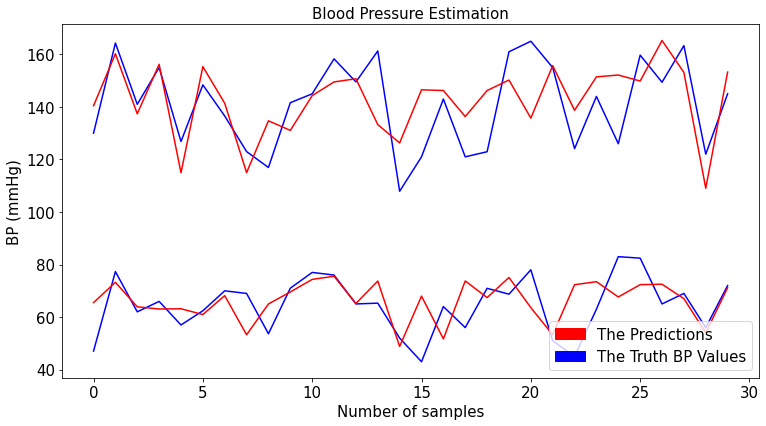

In [ ]:
import matplotlib.pyplot as plt


# print("PRED",predictions[0:20])
# print("\n")
# print("TEST",y_test[0:20])

from matplotlib.pyplot import figure
import matplotlib.patches as mpatches



fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5, forward=True)

red_patch = mpatches.Patch(color='red', label='The Predictions')
blue_patch = mpatches.Patch(color='blue', label='The Truth BP Values')

ax.legend(handles=[red_patch, blue_patch], loc=4 , prop={'size': 15})

plt.plot(y_test_1[:30], "blue") # plot first line
plt.plot(predictions5[:30], "red") 
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.title("Blood Pressure Estimation",fontsize=15)
ax.set_xlabel('Number of samples',fontsize=15)
ax.set_ylabel('BP (mmHg)', fontsize=15)
# figure(figsize=(10, 8), dpi=80)
plt.show()

In [ ]:
predictions5

array([[140.43626,  65.50269],
       [160.22527,  73.22561],
       [137.36371,  63.90984],
       ...,
       [136.79938,  69.9173 ],
       [122.92799,  66.40911],
       [139.289  ,  69.79175]], dtype=float32)

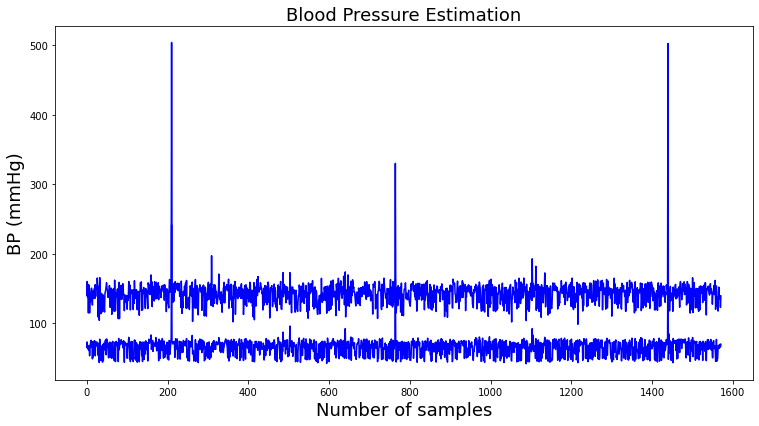

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5, forward=True)
plt.plot(predictions5, "blue") 
plt.title("Blood Pressure Estimation",fontsize=18)
ax.set_xlabel('Number of samples',fontsize=18)
ax.set_ylabel('BP (mmHg)', fontsize=18)
plt.show()

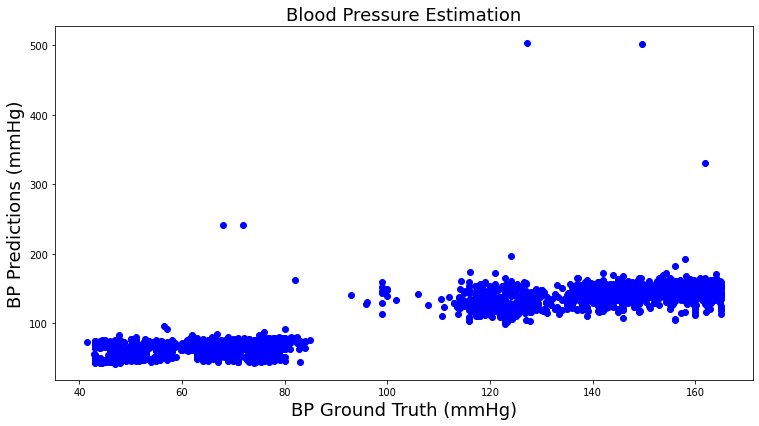

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5, forward=True)
plt.scatter(y_test_1, predictions5, color='blue');

plt.title("Blood Pressure Estimation",fontsize=18)
ax.set_xlabel('BP Ground Truth (mmHg)',fontsize=18)
ax.set_ylabel('BP Predictions (mmHg)', fontsize=18)
plt.show()

# 2n Model - Adadelta

In [ ]:


x_train, x_test, y_train, y_test_2 = train_test_split(X_new , y, test_size=0.2, random_state=0)


model6 = Sequential()
model6.add(Dense(96, input_dim = 180, activation='relu'))
model6.add(Dense(84, activation='relu'))
model6.add(Dense(72, activation='relu'))
model6.add(Dense(60, activation='relu'))
model6.add(Dense(48, activation='relu'))
model6.add(Dense(36, activation='relu'))
model6.add(Dense(24, activation='relu'))
model6.add(Dense(12, activation='relu'))
model6.add(Dense(2, activation='relu'))

model6.compile(loss='mean_squared_error', optimizer='Adadelta', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model6.fit(x_train, y_train, epochs=500, batch_size=64)

model6.save("model_6.h5")


pickle.dump(model6, open('modelSecond.pkl', 'wb'))


Epoch 1/500
99/99 [==============================] - 1s 4ms/step - loss: 12621.0752 - mean_absolute_error: 104.5514
Epoch 2/500
99/99 [==============================] - 0s 4ms/step - loss: 12619.2217 - mean_absolute_error: 104.5415
Epoch 3/500
99/99 [==============================] - 0s 4ms/step - loss: 12616.7910 - mean_absolute_error: 104.5296
Epoch 4/500
99/99 [==============================] - 0s 4ms/step - loss: 12614.1533 - mean_absolute_error: 104.5173
Epoch 5/500
99/99 [==============================] - 0s 4ms/step - loss: 12611.4268 - mean_absolute_error: 104.5050
Epoch 6/500
99/99 [==============================] - 0s 4ms/step - loss: 12608.3398 - mean_absolute_error: 104.4914
Epoch 7/500
99/99 [==============================] - 0s 4ms/step - loss: 12604.6309 - mean_absolute_error: 104.4752
Epoch 8/500
99/99 [==============================] - 0s 4ms/step - loss: 12599.9678 - mean_absolute_error: 104.4548
Epoch 9/500
99/99 [==============================] - 0s 4ms/step - loss:

In [ ]:
# test
# model = load_model('model.h5')

predictions6= model6.predict(x_test)
print("PRED",predictions6[0:10])
print("\n")
print("TEST",y_test_2[0:10])

errors = abs(y_test_2 - predictions6)
print('Mean Absolute Error:', np.mean(errors, axis=0))

errors = y_test_2 - predictions6
print('Standard Deviation: ', np.std(errors, axis=0))


PRED [[127.615685  58.125156]
 [107.33717   49.03317 ]
 [179.70247   82.30011 ]
 [193.42004   88.694496]
 [136.63794   62.46831 ]
 [107.376884  49.03771 ]
 [177.09224   80.53909 ]
 [ 90.062355  41.093124]
 [121.916565  55.84826 ]
 [159.79797   73.03125 ]]


TEST [[129.98135831  47.04511122]
 [164.32087098  77.326354  ]
 [140.99164812  61.99632754]
 [154.99081885  65.96421097]
 [126.83449612  56.99662371]
 [148.3905958   62.39468186]
 [136.53800184  69.99585368]
 [122.99271432  68.99591291]
 [116.94814475  53.64925178]
 [141.58685138  70.99579444]]
Mean Absolute Error: [29.3380175  17.04872761]
Standard Deviation:  [65.65681183 31.45460088]


In [ ]:
type(y_test_2)

numpy.ndarray

In [ ]:
signal_from_cam_2 = [0.03895238786935806,0.030762506648898125,0.01937410607933998,-0.01983427256345749,-0.05868532508611679,-0.07004053890705109,-0.026003239676356316,0.05522875115275383,0.1291295886039734,0.15297570824623108,0.10701341927051544,0.005415075924247503,-0.11778393387794495,-0.21257197856903076,-0.250194251537323,-0.22048215568065643,-0.1385183185338974,-0.023984970524907112,0.10074542462825775,0.19588565826416016,0.2320682853460312,0.18922895193099976,0.11241751164197922,0.04304029420018196,0.01960081420838833,0.018055936321616173,0.013574878685176373,-0.018712211400270462,-0.07492443174123764,-0.14027801156044006,-0.19203662872314453,-0.2100907266139984,-0.1899564564228058,-0.14933213591575623,-0.11778391897678375,-0.10440641641616821,-0.09687258303165436,-0.06327768415212631,-0.006537716835737228,0.06498205661773682,0.11277835071086884,0.1327947974205017,0.12047437578439713,0.10105399042367935,0.08021989464759827,0.06335984170436859,0.04657872021198273,0.032891299575567245,0.021626438945531845,0.009916998445987701,-0.0008398466743528843,-0.0018588436068966985,0.011787638999521732,0.03342541307210922,0.0498836487531662,0.05525776743888855,0.05133445933461189,0.041152939200401306,0.02711930125951767,0.01711922138929367,0.01825394481420517,0.03249737620353699,0.05418802797794342,0.08541985601186752,0.10823749750852585,0.09673664718866348,0.01715368963778019,-0.09406425058841705,-0.18063727021217346,-0.1880364716053009,-0.1342337429523468,-0.05712136998772621,0.011502443812787533,0.06243942305445671,0.09802000969648361,0.11055963486433029,0.09817251563072205,0.05948924273252487,0.009187482297420502,-0.039344459772109985,-0.07603121548891068,-0.09728091955184937,-0.10201902687549591,-0.08699015527963638,-0.056888386607170105,-0.019575614482164383,0.01385959330946207,0.034400757402181625,0.035291705280542374,0.0037233904004096985,-0.055505309253931046,-0.12245459854602814,-0.15563923120498657,-0.14109182357788086,-0.08850674331188202,-0.030238589271903038,0.024796871468424797,0.07263148576021194,0.11471715569496155,0.13887512683868408,0.14116647839546204,0.12411201000213623,0.09330747276544571,0.05585438013076782,0.01730036363005638,-0.018016785383224487,-0.05128907412290573,-0.08380098640918732,-0.11190971732139587,-0.12048687785863876,-0.09721354395151138,-0.030280033126473427,0.0525992289185524,0.12098672240972519,0.13792787492275238,0.11254128068685532,0.061346471309661865,0.006863084156066179,-0.036680951714515686,-0.05971095710992813,-0.051014386117458344,-0.022525448352098465,0.018307145684957504,0.0582432821393013,0.10249059647321701,0.14126771688461304,0.15508873760700226,0.11150553077459335,0.0009443766321055591,-0.15736931562423706,-0.2963809669017792,-0.35892465710639954,-0.3109476864337921,-0.1999213993549347,-0.07845239341259003,0.008536160923540592,0.06293370574712753,0.09025181829929352,0.09389008581638336,0.08467046171426773,0.07618993520736694,0.08332295715808868,0.10322490334510803,0.12943477928638458,0.1508202850818634,0.16163961589336395,0.15170146524906158,0.12134683132171631,0.07266940176486969,0.020004749298095703,-0.02956109307706356,-0.05916302278637886,-0.05748478323221207,-0.02892918325960636,-0.0037848351057618856,-0.019399262964725494,-0.06903354823589325,-0.12221545726060867,-0.13795848190784454,-0.11588606238365173,-0.06885256618261337,-0.018527744337916374,0.021655507385730743,0.04325559735298157,0.04301993548870087,0.03951510414481163,0.049726128578186035,0.08552583307027817,0.12378618866205215,0.13419368863105774,0.10130536556243896,0.02857428975403309,-0.051927600055933,-0.1434181034564972,-0.23788730800151825,-0.3592738211154938,-0.3789873421192169,-0.28238382935523987,-0.0418083630502224,0.03787996247410774]
model6.predict([signal_from_cam_2])

array([[80.22657 , 36.727283]], dtype=float32)

In [ ]:
signal_from_cam= [-0.19395743310451508,-0.13397778570652008,-0.06642476469278336,-0.00400609290227294,0.04940028488636017,0.1056060791015625,0.17126771807670593,0.25075361132621765,0.3304878771305084,0.385836124420166,0.3902944028377533,0.3280150294303894,0.19947871565818787,0.02291148714721203,-0.16587123274803162,-0.3201744556427002,-0.4043360650539398,-0.4104035198688507,-0.36546677350997925,-0.3044014275074005,-0.24522922933101654,-0.18511442840099335,-0.11113037168979645,-0.027769535779953003,0.06156091392040253,0.14375369250774384,0.2204512059688568,0.28527283668518066,0.3213392496109009,0.3095156252384186,0.23773613572120667,0.1294040083885193,0.00886403676122427,-0.1044655591249466,-0.2065752148628235,-0.2890903651714325,-0.33529770374298096,-0.3375154435634613,-0.3064318299293518,-0.26670417189598083,-0.224334254860878,-0.16030514240264893,-0.037550561130046844,0.13837218284606934,0.33715665340423584,0.505218505859375,0.6209288239479065,0.6616799831390381,0.6141523718833923,0.46817365288734436,0.24724945425987244,-0.000021440908312797546,-0.219168022274971,-0.375104695558548,-0.4593260884284973,-0.4823637902736664,-0.4545128047466278,-0.3858606219291687,-0.275950163602829,-0.149588480591774,-0.02973109669983387,0.0444100946187973,0.07027456909418106,0.050793107599020004,0.031174587085843086,0.04778067767620087,0.13081292808055878,0.23930446803569794,0.3136889934539795,0.29787367582321167,0.19707173109054565,0.04643579199910164,-0.10031749308109283,-0.20072254538536072,-0.23266632854938507,-0.20702007412910461,-0.1528751701116562,-0.09664773941040039,-0.04982328042387962,-0.018707968294620514,-0.0064563569612801075,-0.01043056882917881,-0.01623682491481304,-0.008313526399433613,0.0188070647418499,0.05872868001461029,0.09683024138212204,0.12068737298250198,0.12985946238040924,0.12695743143558502,0.11933128535747528,0.09914843738079071,0.06371089816093445,0.007436198648065329,-0.05992235988378525,-0.12099021673202515,-0.15762588381767273,-0.1657705008983612,-0.15945737063884735,-0.14917117357254028,-0.13249628245830536,-0.1018509566783905,-0.05918792635202408,-0.017232712358236313,0.020971041172742844,0.057372190058231354,0.10261250287294388,0.15965959429740906,0.23144583404064178,0.30801400542259216,0.3716323971748352,0.40726399421691895,0.38340258598327637,0.2870757579803467,0.10093791037797928,-0.10274682939052582,-0.2685244679450989,-0.34004607796669006,-0.3625195026397705,-0.37544527649879456,-0.4074031710624695,-0.4400412142276764,-0.44137129187583923,-0.39309513568878174,-0.28794974088668823,-0.14049796760082245,0.03278353065252304,0.20502431690692902,0.3552732467651367,0.4628975987434387,0.5185611844062805,0.5143548250198364,0.4504460096359253,0.32919228076934814,0.1631823182106018,-0.020226500928401947,-0.17662878334522247,-0.26940417289733887,-0.29052549600601196,-0.2698424458503723,-0.23697537183761597,-0.20644645392894745,-0.1698295921087265,-0.12296345084905624,-0.0725134015083313,-0.023371445015072823,0.022308936342597008,0.0754413902759552,0.12982065975666046,0.1778223067522049,0.20719653367996216,0.2210918813943863,0.22519740462303162,0.2093498855829239,0.16233161091804504,0.08167611062526703,-0.0065857539884746075,-0.08127100765705109,-0.1386258453130722,-0.18994520604610443,-0.2347329556941986,-0.2547788918018341,-0.22998972237110138,-0.16674168407917023,-0.09261948615312576,-0.039033591747283936,-0.011466680094599724,0.0019848591182380915,0.01615481823682785,0.03708353638648987,0.06880908459424973,0.11225734651088715,0.1596776843070984,0.18958507478237152,0.1837269514799118,0.13547749817371368,0.05332048609852791,-0.04175598546862602,-0.121566042304039,-0.15176013112068176]
model6.predict([signal_from_cam])

array([[74.740105, 34.23553 ]], dtype=float32)

array([[93.60693 , 43.102127]], dtype=float32)
array([[93.17751, 42.75991]], dtype=float32)


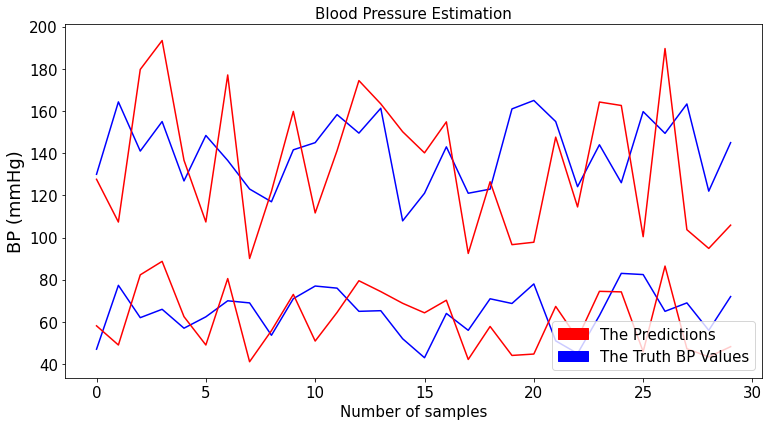

In [ ]:
import matplotlib.pyplot as plt


# print("PRED",predictions[0:20])
# print("\n")
# print("TEST",y_test[0:20])

from matplotlib.pyplot import figure
import matplotlib.patches as mpatches



fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5, forward=True)

red_patch = mpatches.Patch(color='red', label='The Predictions')
blue_patch = mpatches.Patch(color='blue', label='The Truth BP Values')

ax.legend(handles=[red_patch, blue_patch], loc=4 , prop={'size': 15})

plt.plot(y_test_2[:30], "blue") # plot first line
plt.plot(predictions6[:30], "red") 
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.title("Blood Pressure Estimation",fontsize=15)
ax.set_xlabel('Number of samples',fontsize=15)
ax.set_ylabel('BP (mmHg)', fontsize=18)
# figure(figsize=(10, 8), dpi=80)
plt.show()

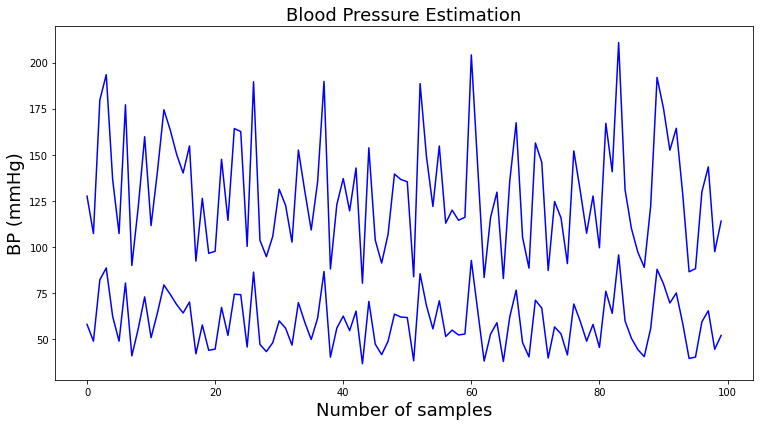

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5, forward=True)
plt.plot(predictions6[:100], "blue") 
plt.title("Blood Pressure Estimation",fontsize=18)
ax.set_xlabel('Number of samples',fontsize=18)
ax.set_ylabel('BP (mmHg)', fontsize=18)
plt.show()

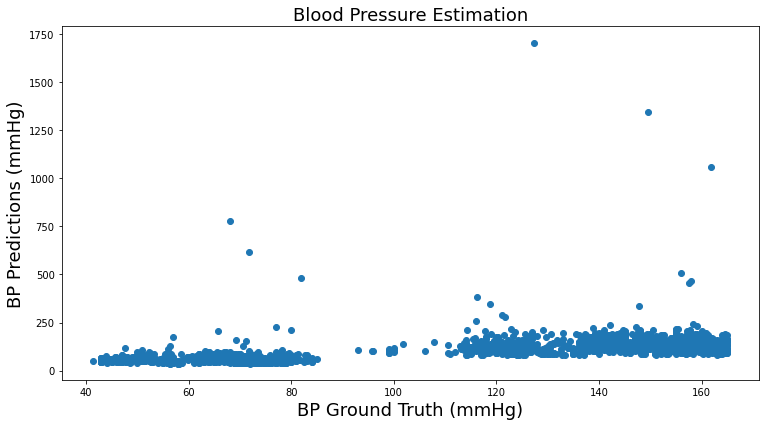

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5, forward=True)
plt.scatter(y_test_2, predictions6);

plt.title("Blood Pressure Estimation",fontsize=18)
ax.set_xlabel('BP Ground Truth (mmHg)',fontsize=18)
ax.set_ylabel('BP Predictions (mmHg)', fontsize=18)
plt.show()

# 3rd Model - RMSprop

In [ ]:


x_train, x_test, y_train, y_test_3 = train_test_split(X_new , y, test_size=0.2, random_state=0)


model7 = Sequential()
model7.add(Dense(96, input_dim = 180, activation='relu'))
model7.add(Dense(84, activation='relu'))
model7.add(Dense(72, activation='relu'))
model7.add(Dense(60, activation='relu'))
model7.add(Dense(48, activation='relu'))
model7.add(Dense(36, activation='relu'))
model7.add(Dense(24, activation='relu'))
model7.add(Dense(12, activation='relu'))
model7.add(Dense(2, activation='relu'))

model7.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model7.fit(x_train, y_train, epochs=500, batch_size=64)

model7.save("model_7.h5")

pickle.dump(model7, open('modelThird.pkl', 'wb'))



Epoch 1/500
99/99 [==============================] - 1s 3ms/step - loss: 4191.6855 - mean_absolute_error: 46.4119
Epoch 2/500
99/99 [==============================] - 0s 3ms/step - loss: 2249.2268 - mean_absolute_error: 33.7537
Epoch 3/500
99/99 [==============================] - 0s 2ms/step - loss: 1929.8943 - mean_absolute_error: 30.8733
Epoch 4/500
99/99 [==============================] - 1s 6ms/step - loss: 1484.1036 - mean_absolute_error: 27.1529
Epoch 5/500
99/99 [==============================] - 0s 3ms/step - loss: 850.8925 - mean_absolute_error: 21.4185
Epoch 6/500
99/99 [==============================] - 0s 3ms/step - loss: 384.3080 - mean_absolute_error: 14.9962
Epoch 7/500
99/99 [==============================] - 0s 3ms/step - loss: 282.9176 - mean_absolute_error: 13.3110
Epoch 8/500
99/99 [==============================] - 0s 3ms/step - loss: 252.3640 - mean_absolute_error: 12.6232
Epoch 9/500
99/99 [==============================] - 0s 2ms/step - loss: 233.4676 - mean_abs

INFO:tensorflow:Assets written to: ram://0e1440cf-5ead-43b7-9cb6-bbc230bfbb7f/assets


In [ ]:
# pickled_model = pickle.load(open('model7.pkl', 'rb'))
# pickled_model.predict(x_test)

In [ ]:
# test
# model = load_model('model.h5')

predictions7= model7.predict(x_test)
print("PRED",predictions7[0:10])
print("\n")
print("TEST",y_test_3[0:10])

errors = abs(y_test_3 - predictions7)
print('Mean Absolute Error:', np.mean(errors, axis=0))

errors = y_test_3 - predictions7
print('Standard Deviation: ', np.std(errors, axis=0))


PRED [[121.003525  44.867844]
 [161.83334   78.70573 ]
 [139.96956   68.36918 ]
 [137.34373   51.126534]
 [117.32983   60.608593]
 [152.64125   75.825966]
 [129.47774   70.62963 ]
 [129.04018   69.377174]
 [135.51682   72.373726]
 [120.710396  71.31983 ]]


TEST [[129.98135831  47.04511122]
 [164.32087098  77.326354  ]
 [140.99164812  61.99632754]
 [154.99081885  65.96421097]
 [126.83449612  56.99662371]
 [148.3905958   62.39468186]
 [136.53800184  69.99585368]
 [122.99271432  68.99591291]
 [116.94814475  53.64925178]
 [141.58685138  70.99579444]]
Mean Absolute Error: [10.54539288  7.62444976]
Standard Deviation:  [15.62947766 11.8171366 ]


In [ ]:
type(y_test_3)

numpy.ndarray

In [ ]:
signal_from_cam_2 = [0.03895238786935806,0.030762506648898125,0.01937410607933998,-0.01983427256345749,-0.05868532508611679,-0.07004053890705109,-0.026003239676356316,0.05522875115275383,0.1291295886039734,0.15297570824623108,0.10701341927051544,0.005415075924247503,-0.11778393387794495,-0.21257197856903076,-0.250194251537323,-0.22048215568065643,-0.1385183185338974,-0.023984970524907112,0.10074542462825775,0.19588565826416016,0.2320682853460312,0.18922895193099976,0.11241751164197922,0.04304029420018196,0.01960081420838833,0.018055936321616173,0.013574878685176373,-0.018712211400270462,-0.07492443174123764,-0.14027801156044006,-0.19203662872314453,-0.2100907266139984,-0.1899564564228058,-0.14933213591575623,-0.11778391897678375,-0.10440641641616821,-0.09687258303165436,-0.06327768415212631,-0.006537716835737228,0.06498205661773682,0.11277835071086884,0.1327947974205017,0.12047437578439713,0.10105399042367935,0.08021989464759827,0.06335984170436859,0.04657872021198273,0.032891299575567245,0.021626438945531845,0.009916998445987701,-0.0008398466743528843,-0.0018588436068966985,0.011787638999521732,0.03342541307210922,0.0498836487531662,0.05525776743888855,0.05133445933461189,0.041152939200401306,0.02711930125951767,0.01711922138929367,0.01825394481420517,0.03249737620353699,0.05418802797794342,0.08541985601186752,0.10823749750852585,0.09673664718866348,0.01715368963778019,-0.09406425058841705,-0.18063727021217346,-0.1880364716053009,-0.1342337429523468,-0.05712136998772621,0.011502443812787533,0.06243942305445671,0.09802000969648361,0.11055963486433029,0.09817251563072205,0.05948924273252487,0.009187482297420502,-0.039344459772109985,-0.07603121548891068,-0.09728091955184937,-0.10201902687549591,-0.08699015527963638,-0.056888386607170105,-0.019575614482164383,0.01385959330946207,0.034400757402181625,0.035291705280542374,0.0037233904004096985,-0.055505309253931046,-0.12245459854602814,-0.15563923120498657,-0.14109182357788086,-0.08850674331188202,-0.030238589271903038,0.024796871468424797,0.07263148576021194,0.11471715569496155,0.13887512683868408,0.14116647839546204,0.12411201000213623,0.09330747276544571,0.05585438013076782,0.01730036363005638,-0.018016785383224487,-0.05128907412290573,-0.08380098640918732,-0.11190971732139587,-0.12048687785863876,-0.09721354395151138,-0.030280033126473427,0.0525992289185524,0.12098672240972519,0.13792787492275238,0.11254128068685532,0.061346471309661865,0.006863084156066179,-0.036680951714515686,-0.05971095710992813,-0.051014386117458344,-0.022525448352098465,0.018307145684957504,0.0582432821393013,0.10249059647321701,0.14126771688461304,0.15508873760700226,0.11150553077459335,0.0009443766321055591,-0.15736931562423706,-0.2963809669017792,-0.35892465710639954,-0.3109476864337921,-0.1999213993549347,-0.07845239341259003,0.008536160923540592,0.06293370574712753,0.09025181829929352,0.09389008581638336,0.08467046171426773,0.07618993520736694,0.08332295715808868,0.10322490334510803,0.12943477928638458,0.1508202850818634,0.16163961589336395,0.15170146524906158,0.12134683132171631,0.07266940176486969,0.020004749298095703,-0.02956109307706356,-0.05916302278637886,-0.05748478323221207,-0.02892918325960636,-0.0037848351057618856,-0.019399262964725494,-0.06903354823589325,-0.12221545726060867,-0.13795848190784454,-0.11588606238365173,-0.06885256618261337,-0.018527744337916374,0.021655507385730743,0.04325559735298157,0.04301993548870087,0.03951510414481163,0.049726128578186035,0.08552583307027817,0.12378618866205215,0.13419368863105774,0.10130536556243896,0.02857428975403309,-0.051927600055933,-0.1434181034564972,-0.23788730800151825,-0.3592738211154938,-0.3789873421192169,-0.28238382935523987,-0.0418083630502224,0.03787996247410774]
model7.predict([signal_from_cam_2])

array([[126.46519,  58.82426]], dtype=float32)

In [ ]:
signal_from_cam= [-0.19395743310451508,-0.13397778570652008,-0.06642476469278336,-0.00400609290227294,0.04940028488636017,0.1056060791015625,0.17126771807670593,0.25075361132621765,0.3304878771305084,0.385836124420166,0.3902944028377533,0.3280150294303894,0.19947871565818787,0.02291148714721203,-0.16587123274803162,-0.3201744556427002,-0.4043360650539398,-0.4104035198688507,-0.36546677350997925,-0.3044014275074005,-0.24522922933101654,-0.18511442840099335,-0.11113037168979645,-0.027769535779953003,0.06156091392040253,0.14375369250774384,0.2204512059688568,0.28527283668518066,0.3213392496109009,0.3095156252384186,0.23773613572120667,0.1294040083885193,0.00886403676122427,-0.1044655591249466,-0.2065752148628235,-0.2890903651714325,-0.33529770374298096,-0.3375154435634613,-0.3064318299293518,-0.26670417189598083,-0.224334254860878,-0.16030514240264893,-0.037550561130046844,0.13837218284606934,0.33715665340423584,0.505218505859375,0.6209288239479065,0.6616799831390381,0.6141523718833923,0.46817365288734436,0.24724945425987244,-0.000021440908312797546,-0.219168022274971,-0.375104695558548,-0.4593260884284973,-0.4823637902736664,-0.4545128047466278,-0.3858606219291687,-0.275950163602829,-0.149588480591774,-0.02973109669983387,0.0444100946187973,0.07027456909418106,0.050793107599020004,0.031174587085843086,0.04778067767620087,0.13081292808055878,0.23930446803569794,0.3136889934539795,0.29787367582321167,0.19707173109054565,0.04643579199910164,-0.10031749308109283,-0.20072254538536072,-0.23266632854938507,-0.20702007412910461,-0.1528751701116562,-0.09664773941040039,-0.04982328042387962,-0.018707968294620514,-0.0064563569612801075,-0.01043056882917881,-0.01623682491481304,-0.008313526399433613,0.0188070647418499,0.05872868001461029,0.09683024138212204,0.12068737298250198,0.12985946238040924,0.12695743143558502,0.11933128535747528,0.09914843738079071,0.06371089816093445,0.007436198648065329,-0.05992235988378525,-0.12099021673202515,-0.15762588381767273,-0.1657705008983612,-0.15945737063884735,-0.14917117357254028,-0.13249628245830536,-0.1018509566783905,-0.05918792635202408,-0.017232712358236313,0.020971041172742844,0.057372190058231354,0.10261250287294388,0.15965959429740906,0.23144583404064178,0.30801400542259216,0.3716323971748352,0.40726399421691895,0.38340258598327637,0.2870757579803467,0.10093791037797928,-0.10274682939052582,-0.2685244679450989,-0.34004607796669006,-0.3625195026397705,-0.37544527649879456,-0.4074031710624695,-0.4400412142276764,-0.44137129187583923,-0.39309513568878174,-0.28794974088668823,-0.14049796760082245,0.03278353065252304,0.20502431690692902,0.3552732467651367,0.4628975987434387,0.5185611844062805,0.5143548250198364,0.4504460096359253,0.32919228076934814,0.1631823182106018,-0.020226500928401947,-0.17662878334522247,-0.26940417289733887,-0.29052549600601196,-0.2698424458503723,-0.23697537183761597,-0.20644645392894745,-0.1698295921087265,-0.12296345084905624,-0.0725134015083313,-0.023371445015072823,0.022308936342597008,0.0754413902759552,0.12982065975666046,0.1778223067522049,0.20719653367996216,0.2210918813943863,0.22519740462303162,0.2093498855829239,0.16233161091804504,0.08167611062526703,-0.0065857539884746075,-0.08127100765705109,-0.1386258453130722,-0.18994520604610443,-0.2347329556941986,-0.2547788918018341,-0.22998972237110138,-0.16674168407917023,-0.09261948615312576,-0.039033591747283936,-0.011466680094599724,0.0019848591182380915,0.01615481823682785,0.03708353638648987,0.06880908459424973,0.11225734651088715,0.1596776843070984,0.18958507478237152,0.1837269514799118,0.13547749817371368,0.05332048609852791,-0.04175598546862602,-0.121566042304039,-0.15176013112068176]
model7.predict([signal_from_cam])

array([[153.8548 ,  76.05635]], dtype=float32)

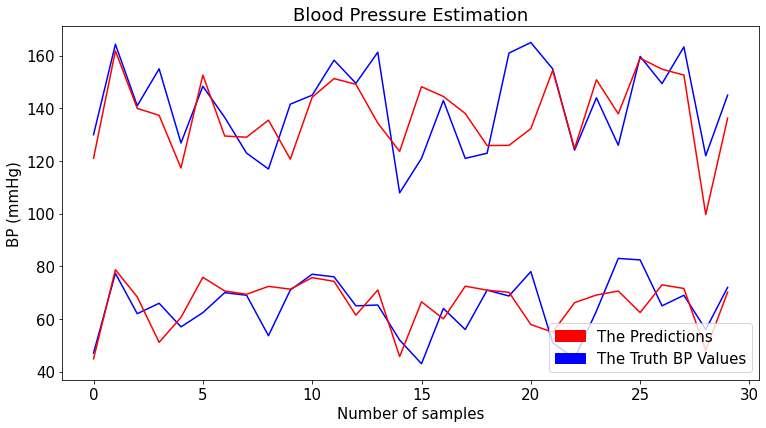

In [ ]:
import matplotlib.pyplot as plt


# print("PRED",predictions[0:20])
# print("\n")
# print("TEST",y_test[0:20])

from matplotlib.pyplot import figure
import matplotlib.patches as mpatches



fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5, forward=True)

red_patch = mpatches.Patch(color='red', label='The Predictions')
blue_patch = mpatches.Patch(color='blue', label='The Truth BP Values')

ax.legend(handles=[red_patch, blue_patch], loc=4 , prop={'size': 15})

plt.plot(y_test_3[:30], "blue") # plot first line
plt.plot(predictions7[:30], "red") 
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.title("Blood Pressure Estimation",fontsize=18)
ax.set_xlabel('Number of samples',fontsize=15)
ax.set_ylabel('BP (mmHg)', fontsize=15)
# figure(figsize=(10, 8), dpi=80)
plt.show()

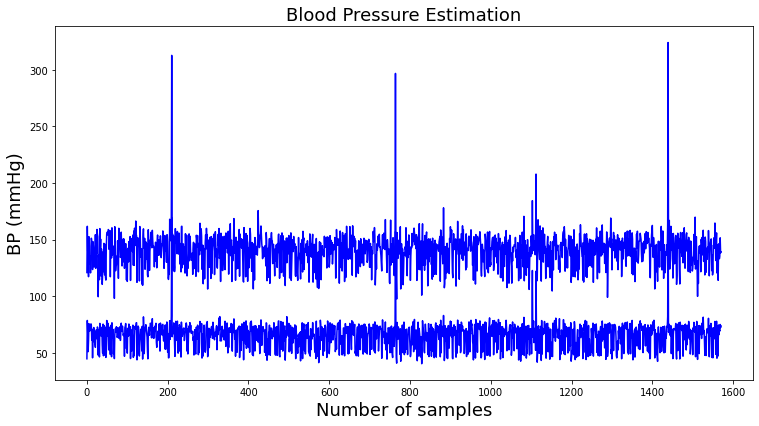

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5, forward=True)
plt.plot(predictions7, "blue") 
plt.title("Blood Pressure Estimation",fontsize=18)
ax.set_xlabel('Number of samples',fontsize=18)
ax.set_ylabel('BP (mmHg)', fontsize=18)
plt.show()

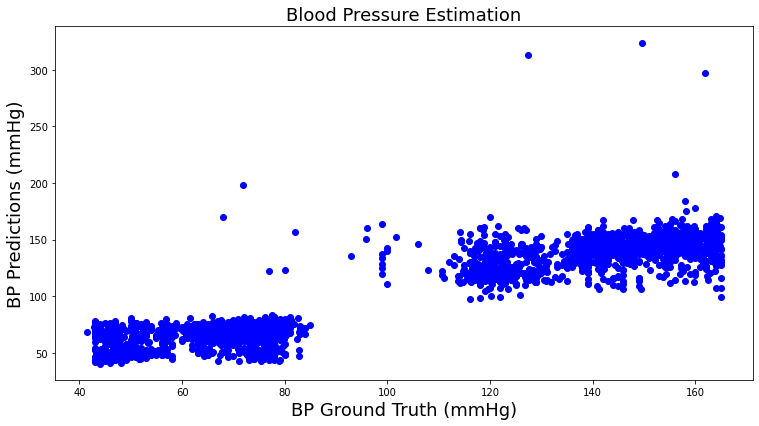

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5, forward=True)
plt.scatter(y_test_3, predictions7, color='blue');

plt.title("Blood Pressure Estimation",fontsize=18)
ax.set_xlabel('BP Ground Truth (mmHg)',fontsize=18)
ax.set_ylabel('BP Predictions (mmHg)', fontsize=18)
plt.show()

# TEST

In [ ]:

# 135 67
Bhanu =[0.48367003528862723,-0.17817506960658003,0.7090643351440433,1.550029646084882,2.36263120565653,3.589382952143297,2.429775106891832,3.3033089455397677,2.941289924440502,3.680952825250894,2.5507362844284582,1.054199556004948,1.0872950339991423,1.2462190667239226,1.9831388260769043,0.31387561953737625,0.774344736688317,-0.08805949450976505,0.05918802419243937,0.21046469087572506,-0.04363129190369199,0.23439423383893812,-0.02998879027224479,0.3410922105662156,-0.10688652175672542,-0.07478139074083694,-0.14217148471546948,-0.1482679995407306,-0.17805017977987328,-0.2656495672558003,-0.219688806695317,-0.27720019689821906,-0.3248315953011517,-0.2792258414099521,-0.38583435723916953,-0.34817371586666007,-0.35569500187813846,-0.397652301653621,-0.4432383519735967,-0.4691938369993701,-0.4341260086998459,-0.4670859339500141,-0.4728264190202701,-0.4635928584307089,-0.49327398144160284,-0.49640549092629704,-0.5030866768231197,-0.5030567755124966,-0.5048253554705948,-0.5071558943029425,-0.5081712559309383,-0.5100404322701562,-0.5095710873646773,-0.5111195268079001,-0.5107064685262895,-0.5108952946507084,-0.5112339779153398,-0.5112278220141586,-0.5112515265199152,-0.5112925150061702,-0.5113237410453029,-0.5113614862546073,-0.5113564880041529,-0.5113348754138207,-0.51132489846516,-0.510696286326788,-0.5108560951951715,-0.5105220766861929,-0.5105717071069701,-0.5106079558925947,-0.5092281962110156,-0.5090733418950852,-0.507464832053978,-0.5079240268587604,-0.5051537303218222,-0.5065116498873133,-0.5037180317852729,-0.507318298716364,-0.5067626039493861,-0.507670067482381,-0.505357185795062,-0.5052789253419289,-0.5005272556784256,-0.5044619587850889,-0.5034541627944821,-0.5057889437641387,-0.5053494484545415,-0.5080782035332516,-0.5025873967249457,-0.508708220790444,-0.508708220790444,-0.5025873967249457,-0.5080782035332516,-0.5053494484545415,-0.5057889437641387,-0.5034541627944821,-0.5044619587850889,-0.5005272556784256,-0.5052789253419289,-0.505357185795062,-0.507670067482381,-0.5067626039493861,-0.507318298716364,-0.5037180317852729,-0.5065116498873133,-0.5051537303218222,-0.5079240268587604,-0.507464832053978,-0.5090733418950852,-0.5092281962110156,-0.5106079558925947,-0.5105717071069701,-0.5105220766861929,-0.5108560951951715,-0.510696286326788,-0.51132489846516,-0.5113348754138207,-0.5113564880041529,-0.5113614862546073,-0.5113237410453029,-0.5112925150061702,-0.5112515265199152,-0.5112278220141586,-0.5112339779153398,-0.5108952946507084,-0.5107064685262895,-0.5111195268079001,-0.5095710873646773,-0.5100404322701562,-0.5081712559309383,-0.5071558943029425,-0.5048253554705948,-0.5030567755124966,-0.5030866768231197,-0.49640549092629704,-0.49327398144160284,-0.4635928584307089,-0.4728264190202701,-0.4670859339500141,-0.4341260086998459,-0.4691938369993701,-0.4432383519735967,-0.397652301653621,-0.35569500187813846,-0.34817371586666007,-0.38583435723916953,-0.2792258414099521,-0.3248315953011517,-0.27720019689821906,-0.219688806695317,-0.2656495672558003,-0.17805017977987328,-0.1482679995407306,-0.14217148471546948,-0.07478139074083694,-0.10688652175672542,0.3410922105662156,-0.02998879027224479,0.23439423383893812,-0.04363129190369199,0.21046469087572506,0.05918802419243937,-0.08805949450976505,0.774344736688317,0.31387561953737625,1.9831388260769043,1.2462190667239226,1.0872950339991423,1.054199556004948,2.5507362844284582,3.680952825250894,2.941289924440502,3.3033089455397677,2.429775106891832,3.589382952143297,2.36263120565653,1.550029646084882,0.7090643351440433,-0.17817506960658003,-0.48367003528862723]


In [ ]:
# 120 63
edy =[0.5013780918280529,-0.3948646460856866,-0.280695584171265,1.0460297950710022,1.0326720792272734,3.0205773729679013,2.5722371955596484,2.297665228554241,2.7422329679276776,0.16350194031689305,1.3730616773956157,0.05870215553954596,2.3697622785777206,2.321621746863892,2.486921244528635,1.699571051607219,2.112541914164135,1.121089319974367,1.320403491157924,1.1701853058919516,1.309899289365307,0.9016364163753494,0.8992181158079525,0.8104993117960215,0.5739317481704117,0.765022714887866,0.5532366227136867,0.8148055949086911,0.3113011951840885,0.20767585698139113,-0.04188412028743427,-0.0869161822074481,-0.1772945919061931,-0.1341138563451246,-0.18289083266864017,-0.10117002213891832,-0.3416255978576102,-0.34842160441619086,-0.44498754057711004,-0.5260086084434352,-0.5582410638514956,-0.5566444098111322,-0.5859687920247716,-0.5821773803196268,-0.6249143603088867,-0.6270729341608757,-0.6436093341879724,-0.6418674331584437,-0.6445131067905372,-0.6391871069911012,-0.6402834977755141,-0.6358339201509579,-0.6396596458569848,-0.6409839450627673,-0.643125167060232,-0.645026820882901,-0.6470178674606504,-0.6487885399749156,-0.6506162437206575,-0.6522701218783578,-0.6537843388639459,-0.6551905476407229,-0.6565138548620818,-0.6578167004364766,-0.6589226489120839,-0.660842111217028,-0.6617893028203649,-0.6633545951944407,-0.6639482309525052,-0.6642101856964207,-0.6639747783451805,-0.665132002968028,-0.6625414356452555,-0.6666608005500677,-0.6624405012301331,-0.6639365948177561,-0.6608141742588701,-0.6610507664803943,-0.66021992441521,-0.663233687251674,-0.6586155431311008,-0.6670114552345451,-0.66178385084248,-0.6767284878635251,-0.672887160053277,-0.6753647120077658,-0.6786240283853602,-0.6798203261724566,-0.6773605020030972,-0.6713774129022652,-0.6713774129022652,-0.6773605020030972,-0.6798203261724566,-0.6786240283853602,-0.6753647120077658,-0.672887160053277,-0.6767284878635251,-0.66178385084248,-0.6670114552345451,-0.6586155431311008,-0.663233687251674,-0.66021992441521,-0.6610507664803943,-0.6608141742588701,-0.6639365948177561,-0.6624405012301331,-0.6666608005500677,-0.6625414356452555,-0.665132002968028,-0.6639747783451805,-0.6642101856964207,-0.6639482309525052,-0.6633545951944407,-0.6617893028203649,-0.660842111217028,-0.6589226489120839,-0.6578167004364766,-0.6565138548620818,-0.6551905476407229,-0.6537843388639459,-0.6522701218783578,-0.6506162437206575,-0.6487885399749156,-0.6470178674606504,-0.645026820882901,-0.643125167060232,-0.6409839450627673,-0.6396596458569848,-0.6358339201509579,-0.6402834977755141,-0.6391871069911012,-0.6445131067905372,-0.6418674331584437,-0.6436093341879724,-0.6270729341608757,-0.6249143603088867,-0.5821773803196268,-0.5859687920247716,-0.5566444098111322,-0.5582410638514956,-0.5260086084434352,-0.44498754057711004,-0.34842160441619086,-0.3416255978576102,-0.10117002213891832,-0.18289083266864017,-0.1341138563451246,-0.1772945919061931,-0.0869161822074481,-0.04188412028743427,0.20767585698139113,0.3113011951840885,0.8148055949086911,0.5532366227136867,0.765022714887866,0.5739317481704117,0.8104993117960215,0.8992181158079525,0.9016364163753494,1.309899289365307,1.1701853058919516,1.320403491157924,1.121089319974367,2.112541914164135,1.699571051607219,2.486921244528635,2.321621746863892,2.3697622785777206,0.05870215553954596,1.3730616773956157,0.16350194031689305,2.7422329679276776,2.297665228554241,2.5722371955596484,3.0205773729679013,1.0326720792272734,1.0460297950710022,-0.280695584171265,-0.3948646460856866,-0.5013780918280529]


In [ ]:
# 113 69 
animesh = [0.07334256087218481,0.3813331056714923,0.6398976540076202,0.3557354142764731,1.3682774708568164,1.2048553576643344,-0.4972228105122153,2.871594325320468,2.988413737488471,2.5479205264316453,0.3152225337016994,3.730285252624641,3.238970943448813,3.113983771374394,1.3174306784523944,1.2526039963380207,0.8041494040737133,0.9778379644212919,0.3996608257212378,-0.2687348230490095,1.6405452487761956,1.1121573834017713,1.2018123023745257,0.3531986875522916,-0.35027726948484467,0.7813084209587967,-0.3856101065475416,0.3479183057946112,-0.5280924248176092,-0.254283642435367,-0.4109837801853873,-0.26288714032380306,-0.2801573412947562,-0.1879189100139407,-0.5018213147127735,-0.41051267821026555,-0.4364949422956836,-0.5301741084950564,-0.40130622338068606,-0.5954375140256924,-0.5047117758322526,-0.4974301682046446,-0.5013126932413283,-0.5409456475924178,-0.5401337742981487,-0.5518032393592478,-0.5265634688448679,-0.5519840955260068,-0.5174174883327773,-0.5277946905677738,-0.5211752002864756,-0.5206393473380698,-0.5253438919919584,-0.5315590236090586,-0.5321789755337735,-0.533576359933347,-0.5338394172030602,-0.5350322134312765,-0.5362395657469884,-0.5374219666100641,-0.5385318317840359,-0.5395759326405792,-0.5404917209417747,-0.5414214556064467,-0.5418561415998427,-0.5439133547337393,-0.5435368673273386,-0.5430752633066536,-0.5436450160517489,-0.5439952724438396,-0.5406025189599857,-0.5457388083329535,-0.5477079893412352,-0.5437978120321411,-0.5349979787157597,-0.5241487899764309,-0.5382481469496239,-0.5506392332686887,-0.5398029861363544,-0.5350251715482404,-0.5234294787996077,-0.510828862109567,-0.5096465728861004,-0.5326605630444893,-0.5240496797665275,-0.5172758949577763,-0.5358906318548825,-0.5089321395014291,-0.5024384241212871,-0.5168481778522874,-0.5168481778522874,-0.5024384241212871,-0.5089321395014291,-0.5358906318548825,-0.5172758949577763,-0.5240496797665275,-0.5326605630444893,-0.5096465728861004,-0.510828862109567,-0.5234294787996077,-0.5350251715482404,-0.5398029861363544,-0.5506392332686887,-0.5382481469496239,-0.5241487899764309,-0.5349979787157597,-0.5437978120321411,-0.5477079893412352,-0.5457388083329535,-0.5406025189599857,-0.5439952724438396,-0.5436450160517489,-0.5430752633066536,-0.5435368673273386,-0.5439133547337393,-0.5418561415998427,-0.5414214556064467,-0.5404917209417747,-0.5395759326405792,-0.5385318317840359,-0.5374219666100641,-0.5362395657469884,-0.5350322134312765,-0.5338394172030602,-0.533576359933347,-0.5321789755337735,-0.5315590236090586,-0.5253438919919584,-0.5206393473380698,-0.5211752002864756,-0.5277946905677738,-0.5174174883327773,-0.5519840955260068,-0.5265634688448679,-0.5518032393592478,-0.5401337742981487,-0.5409456475924178,-0.5013126932413283,-0.4974301682046446,-0.5047117758322526,-0.5954375140256924,-0.40130622338068606,-0.5301741084950564,-0.4364949422956836,-0.41051267821026555,-0.5018213147127735,-0.1879189100139407,-0.2801573412947562,-0.26288714032380306,-0.4109837801853873,-0.254283642435367,-0.5280924248176092,0.3479183057946112,-0.3856101065475416,0.7813084209587967,-0.35027726948484467,0.3531986875522916,1.2018123023745257,1.1121573834017713,1.6405452487761956,-0.2687348230490095,0.3996608257212378,0.9778379644212919,0.8041494040737133,1.2526039963380207,1.3174306784523944,3.113983771374394,3.238970943448813,3.730285252624641,0.3152225337016994,2.5479205264316453,2.988413737488471,2.871594325320468,-0.4972228105122153,1.2048553576643344,1.3682774708568164,0.3557354142764731,0.6398976540076202,0.3813331056714923,-0.07334256087218481]


In [ ]:
# 121 64 
shashank =[0.49260735540391465,-0.29555687187778146,-0.13930327248446292,0.18343700889980485,0.39359578389049277,2.702705475264655,2.1222481627298118,0.6358128337887977,1.3712292164271365,1.9777014550750949,0.985866152871372,1.6881193948675046,2.688783850049978,3.8864664944483813,3.469603267698408,2.9431208782168365,2.241647354998736,1.15147226704095,0.925482982144245,0.5104704649294937,0.17018443099703673,0.10694816836252292,0.3028327674478232,0.43935790686763515,0.5336529014606578,0.5871616308678502,0.3378822094631035,-0.0410199780426125,-0.2665711168500615,-0.31862611117696377,-0.4083847725087748,-0.36850447312322837,-0.4864780892995325,-0.4768799850641968,-0.4689020894670647,-0.4894830944675296,-0.49413159732069223,-0.4413166074756254,-0.42159214250432664,-0.43498977860709825,-0.44511389009078517,-0.4752079363198636,-0.4929836780085898,-0.5081255390913485,-0.5124232947826898,-0.5104288662811591,-0.5164293905504437,-0.5272678552711301,-0.5318599390357771,-0.5308730429718869,-0.5328785544576548,-0.5311720604266582,-0.5335157351268228,-0.5332568240068459,-0.533234232434443,-0.533879704126078,-0.5336113721986606,-0.5334585904480946,-0.5335164516890731,-0.5335238283079485,-0.5335316865041174,-0.5335560607121259,-0.5334915974514217,-0.5335323117549795,-0.533671704005958,-0.5331829159501161,-0.5325714611038566,-0.5348249276327173,-0.5350309125827217,-0.5305857376213414,-0.5305341059321658,-0.5341033071441549,-0.5349477275210908,-0.5337261059897949,-0.5330769895808821,-0.5355557975264108,-0.5314430019510111,-0.5243543926072379,-0.5277452157325235,-0.5322487563400229,-0.525365809132123,-0.5260329621196378,-0.5280182027351505,-0.5250781369883738,-0.5253557793241522,-0.5290886647117021,-0.5333626544217398,-0.5264291771939844,-0.5258174765292134,-0.5324113587077803,-0.5324113587077803,-0.5258174765292134,-0.5264291771939844,-0.5333626544217398,-0.5290886647117021,-0.5253557793241522,-0.5250781369883738,-0.5280182027351505,-0.5260329621196378,-0.525365809132123,-0.5322487563400229,-0.5277452157325235,-0.5243543926072379,-0.5314430019510111,-0.5355557975264108,-0.5330769895808821,-0.5337261059897949,-0.5349477275210908,-0.5341033071441549,-0.5305341059321658,-0.5305857376213414,-0.5350309125827217,-0.5348249276327173,-0.5325714611038566,-0.5331829159501161,-0.533671704005958,-0.5335323117549795,-0.5334915974514217,-0.5335560607121259,-0.5335316865041174,-0.5335238283079485,-0.5335164516890731,-0.5334585904480946,-0.5336113721986606,-0.533879704126078,-0.533234232434443,-0.5332568240068459,-0.5335157351268228,-0.5311720604266582,-0.5328785544576548,-0.5308730429718869,-0.5318599390357771,-0.5272678552711301,-0.5164293905504437,-0.5104288662811591,-0.5124232947826898,-0.5081255390913485,-0.4929836780085898,-0.4752079363198636,-0.44511389009078517,-0.43498977860709825,-0.42159214250432664,-0.4413166074756254,-0.49413159732069223,-0.4894830944675296,-0.4689020894670647,-0.4768799850641968,-0.4864780892995325,-0.36850447312322837,-0.4083847725087748,-0.31862611117696377,-0.2665711168500615,-0.0410199780426125,0.3378822094631035,0.5871616308678502,0.5336529014606578,0.43935790686763515,0.3028327674478232,0.10694816836252292,0.17018443099703673,0.5104704649294937,0.925482982144245,1.15147226704095,2.241647354998736,2.9431208782168365,3.469603267698408,3.8864664944483813,2.688783850049978,1.6881193948675046,0.985866152871372,1.9777014550750949,1.3712292164271365,0.6358128337887977,2.1222481627298118,2.702705475264655,0.39359578389049277,0.18343700889980485,-0.13930327248446292,-0.29555687187778146,-0.49260735540391465]


In [ ]:
# 120 76
kamil = [0.49209071263728016,-0.4884074508044748,0.11597198935487399,1.355831626100257,1.8334846676338055,5.1561935769428935,3.38646816449271,2.501271723894682,1.230666998723635,2.959941737342816,1.1789496965341477,0.6046076714653662,2.6850358020025524,1.7856669219289083,1.9760785683996953,0.20492397959978972,-0.3366417685465879,0.3906897859678856,-0.09742457389905128,0.8789639366322253,0.7845899916611152,0.0423879246017835,-0.13990829007123343,-0.2602549770206743,-0.02996917055979363,-0.25952076987493067,-0.3107686786519994,-0.035635536137067186,-0.13529719631006185,-0.2839873638823557,-0.2976758334315495,-0.2304914515561446,-0.28783338133949465,-0.26841695620400446,-0.3158728950344321,-0.4383405230350408,-0.42236051637253547,-0.4313901265343651,-0.3980381514626071,-0.4354060249993634,-0.40449347086031123,-0.3814246437810826,-0.4197723270718022,-0.43025310017842244,-0.4155317161770831,-0.4340997585360681,-0.446894632691194,-0.443399950535783,-0.4294075246520705,-0.44811242840107446,-0.44649206772251826,-0.44830090611702456,-0.4509739273393703,-0.4525615332350062,-0.45270626551885107,-0.45379520314999855,-0.45502632535305937,-0.45597374049959377,-0.45685746814453804,-0.45769555413934904,-0.45847210838881963,-0.45919502827026776,-0.4599586267954462,-0.46067811971302797,-0.4608719312042693,-0.4618498818170934,-0.46179221666158676,-0.4615089598244245,-0.4627122902509681,-0.4660014763984621,-0.46566628013676625,-0.46618892655492217,-0.46475991969954866,-0.46444401931013257,-0.46277684641109623,-0.4682675840627438,-0.46726621939463203,-0.46181917155975644,-0.4566054459378546,-0.4693380521065622,-0.4729308052812424,-0.4423529998328712,-0.46369395914607064,-0.47043173028277985,-0.4558495382187565,-0.46580767550061764,-0.467284371180057,-0.4816574893163926,-0.4572806478633958,-0.45475754968932924,-0.45475754968932924,-0.4572806478633958,-0.4816574893163926,-0.467284371180057,-0.46580767550061764,-0.4558495382187565,-0.47043173028277985,-0.46369395914607064,-0.4423529998328712,-0.4729308052812424,-0.4693380521065622,-0.4566054459378546,-0.46181917155975644,-0.46726621939463203,-0.4682675840627438,-0.46277684641109623,-0.46444401931013257,-0.46475991969954866,-0.46618892655492217,-0.46566628013676625,-0.4660014763984621,-0.4627122902509681,-0.4615089598244245,-0.46179221666158676,-0.4618498818170934,-0.4608719312042693,-0.46067811971302797,-0.4599586267954462,-0.45919502827026776,-0.45847210838881963,-0.45769555413934904,-0.45685746814453804,-0.45597374049959377,-0.45502632535305937,-0.45379520314999855,-0.45270626551885107,-0.4525615332350062,-0.4509739273393703,-0.44830090611702456,-0.44649206772251826,-0.44811242840107446,-0.4294075246520705,-0.443399950535783,-0.446894632691194,-0.4340997585360681,-0.4155317161770831,-0.43025310017842244,-0.4197723270718022,-0.3814246437810826,-0.40449347086031123,-0.4354060249993634,-0.3980381514626071,-0.4313901265343651,-0.42236051637253547,-0.4383405230350408,-0.3158728950344321,-0.26841695620400446,-0.28783338133949465,-0.2304914515561446,-0.2976758334315495,-0.2839873638823557,-0.13529719631006185,-0.035635536137067186,-0.3107686786519994,-0.25952076987493067,-0.02996917055979363,-0.2602549770206743,-0.13990829007123343,0.0423879246017835,0.7845899916611152,0.8789639366322253,-0.09742457389905128,0.3906897859678856,-0.3366417685465879,0.20492397959978972,1.9760785683996953,1.7856669219289083,2.6850358020025524,0.6046076714653662,1.1789496965341477,2.959941737342816,1.230666998723635,2.501271723894682,3.38646816449271,5.1561935769428935,1.8334846676338055,1.355831626100257,0.11597198935487399,-0.4884074508044748,-0.49209071263728016]


In [ ]:
model5.predict([Bhanu])

array([[150.65414,  78.77654]], dtype=float32)

In [ ]:
print("Bhanu 135 67",model5.predict([Bhanu]))
print("edy 120 63",model5.predict([edy]))
print("animesh 113 69 ",model5.predict([animesh]))
print("shashank 121 64",model5.predict([shashank]))
print("kamil 120 76",model5.predict([kamil]))


Bhanu 135 67 [[150.65414  78.77654]]
edy 120 63 [[166.55132  87.33938]]
animesh 113 69  [[158.08484  87.76592]]
shashank 121 64 [[174.45105  91.50198]]
kamil 120 76 [[153.209    80.91795]]


In [ ]:
print("Bhanu 135 67",model6.predict([Bhanu]))
print("edy 120 63",model6.predict([edy]))
print("animesh 113 69 ",model6.predict([animesh]))
print("shashank 121 64",model6.predict([shashank]))
print("kamil 120 76",model6.predict([kamil]))

Bhanu 135 67 [[140.44144   64.490234]]
edy 120 63 [[161.58109   74.194214]]
animesh 113 69  [[109.96248   50.221897]]
shashank 121 64 [[152.58716  69.77457]]
kamil 120 76 [[142.82837  65.55359]]


In [ ]:
print("Bhanu 135 67",model7.predict([Bhanu]))
print("edy 120 63",model7.predict([edy]))
print("animesh 113 69 ",model7.predict([animesh]))
print("shashank 121 64",model7.predict([shashank]))
print("kamil 120 76",model7.predict([kamil]))

Bhanu 135 67 [[126.51566  46.22564]]
edy 120 63 [[135.92694   48.111797]]
animesh 113 69  [[142.19417   58.074295]]
shashank 121 64 [[142.29572   54.516792]]
kamil 120 76 [[119.8606    44.140312]]
